In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.25)
from glob import glob

import matplotlib as mpl

In [2]:
eCON= '/data/bswift-1/Pessoa_Lab/eCON'

yoked = pd.read_excel(join(eCON,'onsetdir/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1').reset_index()

In [3]:
rois = pd.read_csv(join(eCON,'ApprRetrSeg/Parcellations/MNI/Schaefer2018_300Parcels_17Networks_order.txt'),header=None,sep='\t')
names = rois[1].values 

In [4]:
df = pd.DataFrame()
for i, row in yoked.iterrows():
    con_beta = np.loadtxt(join(eCON,'dataset/results_ShockUncensored/{subj}/controllable/splitted_regs/ROI_Schaefer2018_300ROIs/noProx/{subj}_bucket_REML_clean.1D'.format(subj=row['control'])))
    uncon_beta = np.loadtxt(join(eCON,'dataset/results_ShockUncensored/{subj}/uncontrollable/splitted_regs/ROI_Schaefer2018_300ROIs/noProx/{subj}_bucket_REML_clean.1D'.format(subj=row['uncontrol'])))
    
    shock_paired_diff = uncon_beta[:,1::2][:,-1] - con_beta[:,1::2][:,-1] # only shock betas
    
    tmp_df = pd.DataFrame(shock_paired_diff,index=names).T
    tmp_df['Pair'] = 'P{:02d}'.format(i)
    
    df = pd.concat([df,tmp_df],axis=0)

# Distributions of shock estimates (uncontrol vs. control)

Sample size: 18300
Sample size after removing outliers (< -5 and > 5): 18263


Text(0.5, 1.0, 'Shock estimates (uncontrol vs. control)')

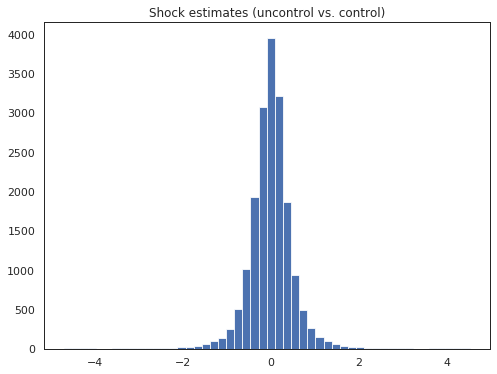

In [7]:
est = df[names].values.flatten()
print('Sample size:',est.size)
est = est[np.logical_and(est > -5, est < 5)]
print('Sample size after removing outliers (< -5 and > 5):',est.size)
plt.figure(figsize = (8,6))
_= plt.hist(est,bins=50)
plt.title('Shock estimates (uncontrol vs. control)')

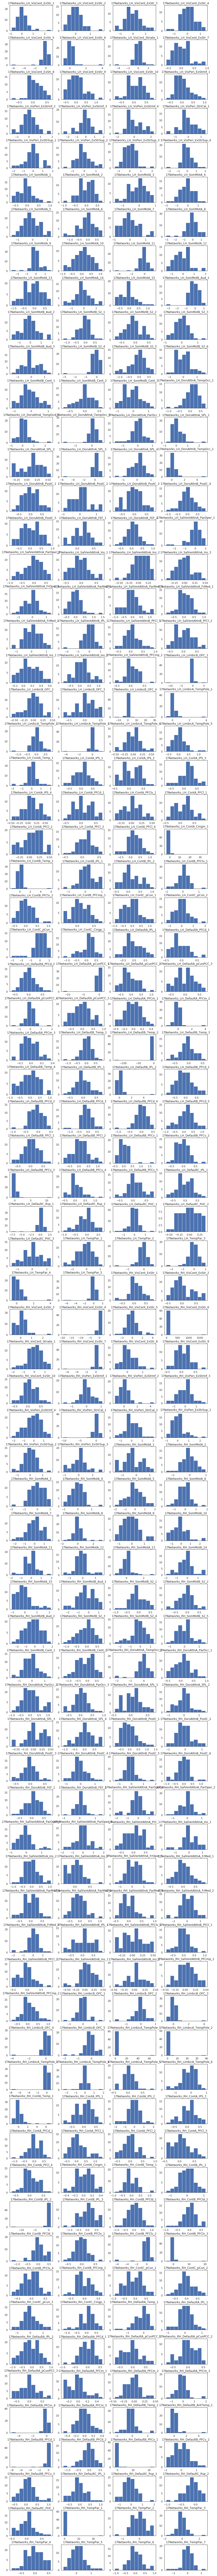

In [8]:
fig, axes = plt.subplots(ncols=4,nrows=75,figsize=(15,200))
axes = axes.flatten()
fig.subplots_adjust(hspace = 0.35)
for ii, ax in enumerate(axes):
    ax.hist(df.loc[:,names[ii]])
    ax.set_title(names[ii],)
    

In [5]:
df.shape

(61, 301)

In [6]:
df.head()

17Networks_LH_VisCent_ExStr_1  17Networks_LH_VisCent_ExStr_2  \
0                       0.369144                       0.493757   
0                       0.673362                      -0.085299   
0                       0.481789                       0.459959   
0                       0.083641                       0.377474   
0                       0.365583                       0.888180   

   17Networks_LH_VisCent_ExStr_3  17Networks_LH_VisCent_ExStr_4  \
0                       0.602073                       0.639449   
0                       0.002120                      -0.351631   
0                      -0.642051                       0.970480   
0                      -1.421309                      -0.327127   
0                       0.451740                       0.070736   

   17Networks_LH_VisCent_ExStr_5  17Networks_LH_VisCent_ExStr_6  \
0                       0.499736                       0.472043   
0                      -0.396522                       0.558074   
0                       0.042170                       0.325836   
0                      -0.037690                       0.098650   
0                       0.214203                       0.094376   

   17Networks_LH_VisCent_Striate_1  17Networks_LH_VisCent_ExStr_7  \
0                         1.906421                       0.708543   
0                        -0.889390                      -0.147236   
0                        -0.780570                       0.930312   
0                        -0.106240                       0.281139   
0                         1.087994                       0.854699   

   17Networks_LH_VisCent_ExStr_8  17Networks_LH_VisCent_ExStr_9  ...  \
0                       0.411637                       0.866724  ...   
0                      -0.015728                      -0.103389  ...   
0                       0.215130                       0.306787  ...   
0                       0.636060                       0.142160  ...   
0                       0.230553                       0.543743  ...   

   17Networks_RH_DefaultC_Rsp_2  17Networks_RH_DefaultC_PHC_1  \
0                     -0.124990                     -0.416837   
0                     -0.205303                     -0.181338   
0                     -0.143338                     -0.026630   
0                     -0.713756                     -0.285113   
0                      0.001337                     -0.348483   

   17Networks_RH_TempPar_1  17Networks_RH_TempPar_2  17Networks_RH_TempPar_3  \
0                 0.638315                 0.862997                 0.878255   
0                -0.246158                 0.005125                -0.780429   
0                 0.065217                -0.434129                -1.082696   
0                -0.211145                -0.555974                 0.046182   
0                26.280033                 0.013896                -1.834290   

   17Networks_RH_TempPar_4  17Networks_RH_TempPar_5  17Networks_RH_TempPar_6  \
0                 0.572466                 1.207256                 0.960380   
0                 0.042802                 0.900622                -0.315384   
0                -0.183610                 0.821516                 0.268399   
0                -0.601630                -0.412635                 0.564287   
0                -0.358260                -0.396725                -0.107691   

   17Networks_RH_TempPar_7  Pair  
0                 1.289329   P00  
0                 0.247174   P01  
0                 0.088087   P02  
0                -0.221842   P03  
0                -0.107498   P04  

[5 rows x 301 columns]

In [12]:
rba_df = pd.melt(df,id_vars='Pair',var_name='ROI',value_name='Y')
print('Before outlier removal:',rba_df.shape)
rba_df = rba_df[(rba_df['Y'] > -5) & (rba_df['Y'] < 5)]
print('After outlier removal:',rba_df.shape)

Before outlier removal: (18300, 3)
After outlier removal: (18263, 3)


In [14]:
import os
from os.path import isdir

In [18]:
if isdir('data'):
    rba_df.to_csv('data/uncon_v_con_shock_MR_Schaefer2018_300ROIs.txt',sep='\t',float_format='%.4f',index=False)
else:
    os.mkdir('data')
    rba_df.to_csv('data/uncon_v_con_shock_MR_Schaefer2018_300ROIs.txt',sep='\t',float_format='%.4f',index=False)